In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

In [138]:
data_location = '/home/goldenmeta/Documents/GitHub/Projects/Airline-Ticket-Prediction/data/cleaned_data/cleaned_data.csv'
data = pd.read_csv(data_location)
data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Date_of_Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


# Analyse

## When will most of the flights take-off

In [139]:
# based on the columns, we can analyse that the dep_time_hour feature can tell differences.
def flight_dep_time(hour):
    '''
    Applies categories on flights based on departure times.
    '''
    if (hour > 4) and (hour <= 8):
        return "Early Morning"
    elif (hour > 8) and (hour <= 12):
        return "Morning"
    elif (hour > 12) and (hour <= 16):
        return "Noon"
    elif (hour > 16) and (hour <= 20):
        return "Evening"
    elif (hour > 20) and (hour <= 24):
        return "Night"
    else:
        return "Late Night"

In [140]:
# Apply the function flight_dep_time on each of the variables. 
flight_periods = data['Dep_Time_Hour'].apply(flight_dep_time)
flight_periods

0                Night
1        Early Morning
2              Morning
3              Evening
4                 Noon
             ...      
10677          Evening
10678          Evening
10679    Early Morning
10680          Morning
10681          Morning
Name: Dep_Time_Hour, Length: 10682, dtype: object

In [141]:
flight_periods_frequencies = flight_periods.value_counts()
flight_periods_frequencies

Dep_Time_Hour
Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: count, dtype: int64

# Duration correlation with Price

In [146]:
# total duration in minutes
data['Total_Duration_Minutes'] = (data['Duration_Hour'] * 60) + data['Duration_Minute']
data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Date_of_Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Total_Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140


<Axes: xlabel='Total_Duration_Minutes', ylabel='Price'>

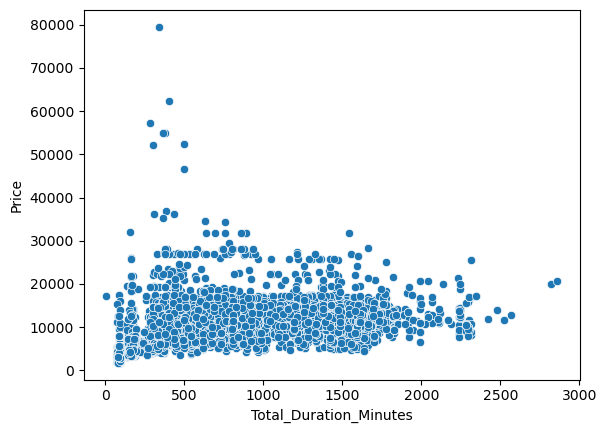

In [148]:
sns.scatterplot(x='Total_Duration_Minutes', y='Price', data=data)

<Axes: xlabel='Total_Duration_Minutes', ylabel='Price'>

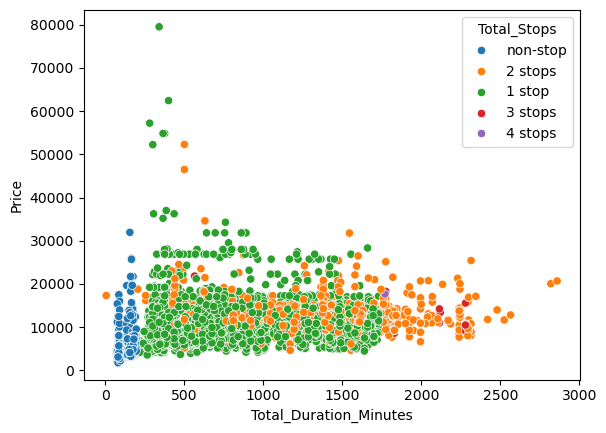

In [149]:
# Considering HUE with total_stops
sns.scatterplot(x='Total_Duration_Minutes', hue='Total_Stops', y='Price', data=data)

What we cam derive from this data is that the shorter the travel time is (total_duration_minutes) cheaper the plane tickers are in most cases. What's even more evident is that flights which are non-stop and 1 stops are relatively more expensive than having flights with more than 1 stop.

## Which route Jet Airways is extremely used?

In [152]:
jet_airways = data[data["Airline"] == 'Jet Airways']
jet_airways.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Date_of_Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute,Total_Duration_Minutes
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25,15,30,930
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,22270,1,3,2019,8,0,5,5,21,5,1265


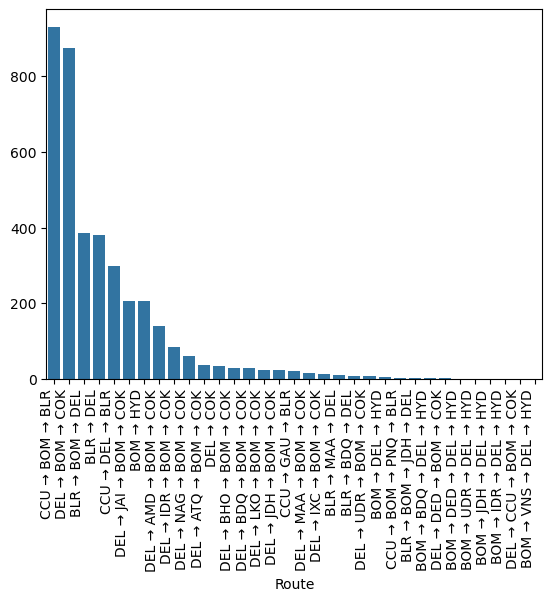

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
BOM → BDQ → DEL → HYD      2
DEL → DED → BOM → COK      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
Name: count, dtype: int64

In [162]:
jet_airways_routes = jet_airways['Route'].value_counts()
sns.barplot(x=jet_airways_routes.index, y=jet_airways_routes.values)
plt.xticks(rotation=90, ha='right')
plt.show()
jet_airways_routes

## Airlines correlation with the Price

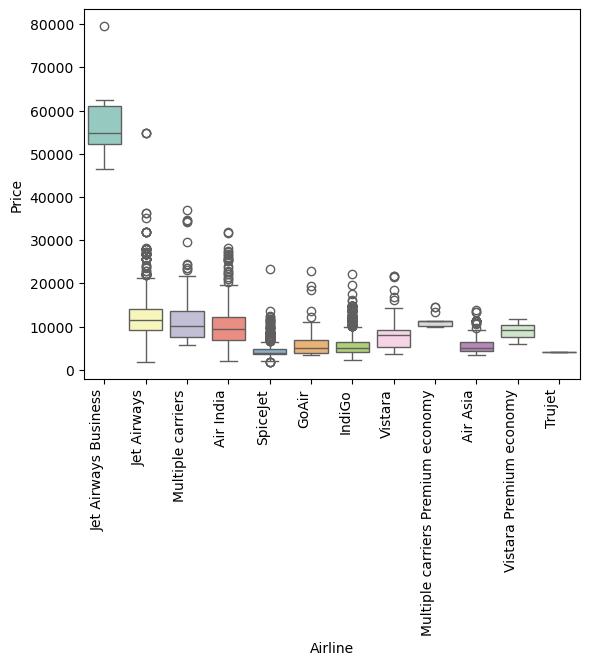

In [172]:
sns.boxplot(x='Airline', y='Price', data=data.sort_values('Price', ascending=False), palette="Set3")
plt.xticks(rotation=90, ha='right')
plt.show()